<a href="https://colab.research.google.com/github/Sahithivengalatooru/Product-Outlet-Sales-Analysis-and-Prediction/blob/main/Techocollabs_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [301]:
#step1. Problem Statement:
 #The problem at hand is to build a predictive model that can effectively forecast the sales of various products in different stores based on given attributes.The data scientists at BigMart aim to understand the key factors influencing sales and leverage this understanding to enhance revenue. The dataset consists of 1559 products across 10 stores, with attributes such as item weight, item type, store details, and more. The challenge is to develop a robust model capable of accurate sales predictions, accounting for missing values and potential outliers in the data.

In [302]:
#step2
#Hypothesis 1: Item Type Impact on Sales
               #Null Hypothesis (H0): The type of item does not significantly impact sales.
               #Alternative Hypothesis (H1): Certain item types exhibit a significant influence on sales.
#Hypothesis 2: Store Location Affects Sales
               #Null Hypothesis (H0): The location of the store has no substantial effect on sales.
               #Alternative Hypothesis (H1): The geographic location of the store plays a crucial role in determining sales.
#Hypothesis 3: Outlet Size Correlates with Sales
               #Null Hypothesis (H0): The size of the store outlet does not correlate with sales.
               #Alternative Hypothesis (H1): Larger store outlets are associated with higher sales.
#Hypothesis 4: Item Weight Impact on Sales
               #Null Hypothesis (H0): The weight of the item does not have a significant impact on sales.
               #Alternative Hypothesis (H1): Items with specific weights contribute significantly to higher sales.
#Hypothesis 5: Pricing Strategy Influences Sales
               #Null Hypothesis (H0): The pricing strategy does not affect sales.
               #Alternative Hypothesis (H1): An effective pricing strategy positively impacts sales.
#Hypothesis 6: Establishment Year Affects Sales
               #Null Hypothesis (H0): The establishment year of the store is not related to sales.
               #Alternative Hypothesis (H1): Stores established in certain years exhibit variations in sales.

In [303]:
#step3:importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [304]:
data = pd.read_csv('Train.csv')

In [305]:
# step4. Data Structure and Content
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
  Item_Identifier  Item_Weight Item_Fat_

In [306]:
#step5.1:Exploratory Data Analysis
# Print the column names to verify
print(data.columns)

# Drop the columns
columns_to_drop = [ 'Outlet_Identifier']
data.drop(columns_to_drop, axis=1, inplace=True)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [307]:
#5.2 Print the column names to verify
print(data.columns)

# Drop the columns
columns_to_drop = [ 'Item_Identifier']
data.drop(columns_to_drop, axis=1, inplace=True)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [308]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [309]:
#5.3
# Check for missing values in the dataset
print("Missing Values:\n", data.isnull().sum())

# Handle missing values - for simplicity, fill numerical columns with mean and categorical columns with mode
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

Missing Values:
 Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [310]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [311]:
#5.4
#Removing Duplicates
# Check for and remove duplicate rows
print("Number of Duplicate Rows:", data.duplicated().sum())
data = data.drop_duplicates()


Number of Duplicate Rows: 0


In [312]:
# 5.5 Outlier Treatment
# Define a function to detect and treat outliers using IQR method
def treat_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

outlier_columns = ['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
print(treat_outliers(data, outlier_columns))


None


In [270]:
# 5.5 Encoding Categorical Variables (Dummy Variables)
data = pd.get_dummies(data, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)

# Print the updated data information
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Item_Fat_Content_Low Fat         8523 non-null   uint8  
 6   Item_Fat_Content_Regular         8523 non-null   uint8  
 7   Item_Fat_Content_low fat         8523 non-null   uint8  
 8   Item_Fat_Content_reg             8523 non-null   uint8  
 9   Item_Type_Breads                 8523 non-null   uint8  
 10  Item_Type_Breakfast              8523 non-null   uint8  
 11  Item_Type_Canned                 8523 non-null   uint8  
 12  Item_Type_Dairy     

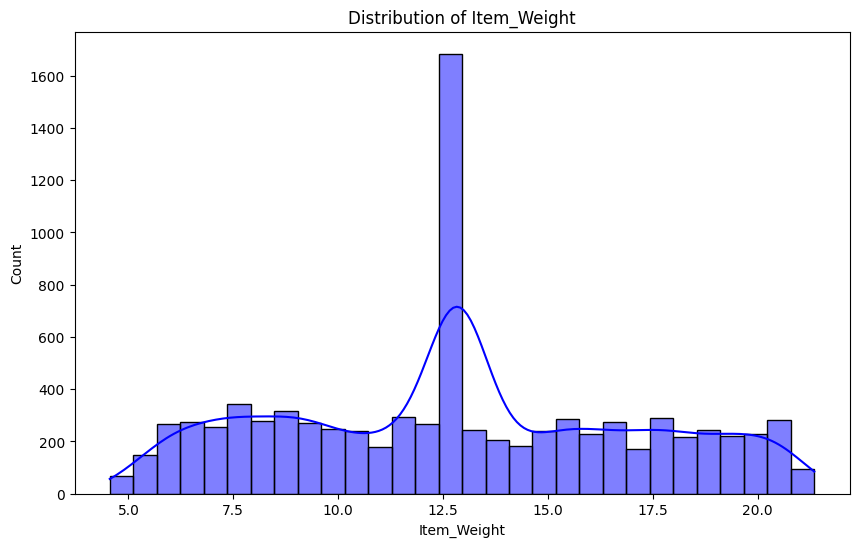

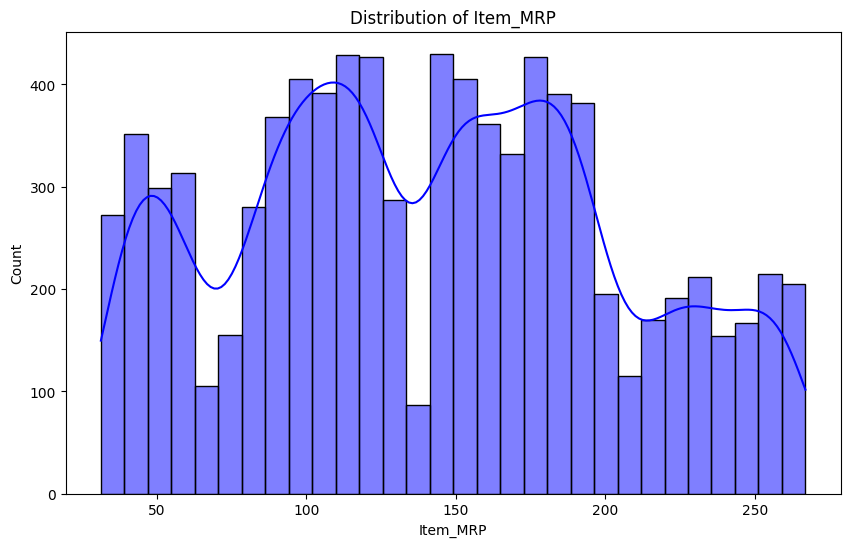

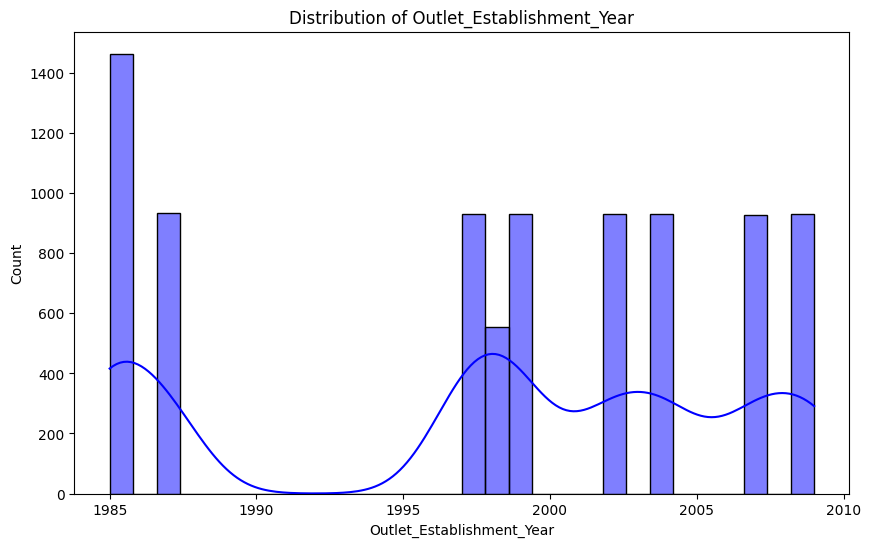

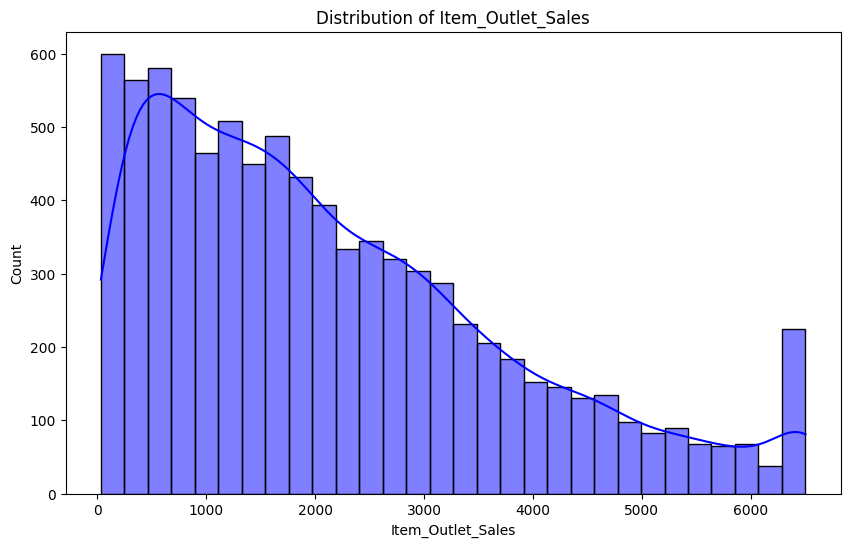

In [313]:
# step6. Univariate Analysis

# 6.1 Univariate Analysis - Numerical Variables
numerical_columns = ['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
categorical_columns = ['Item_Fat', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


# Plot histograms for numerical variables
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

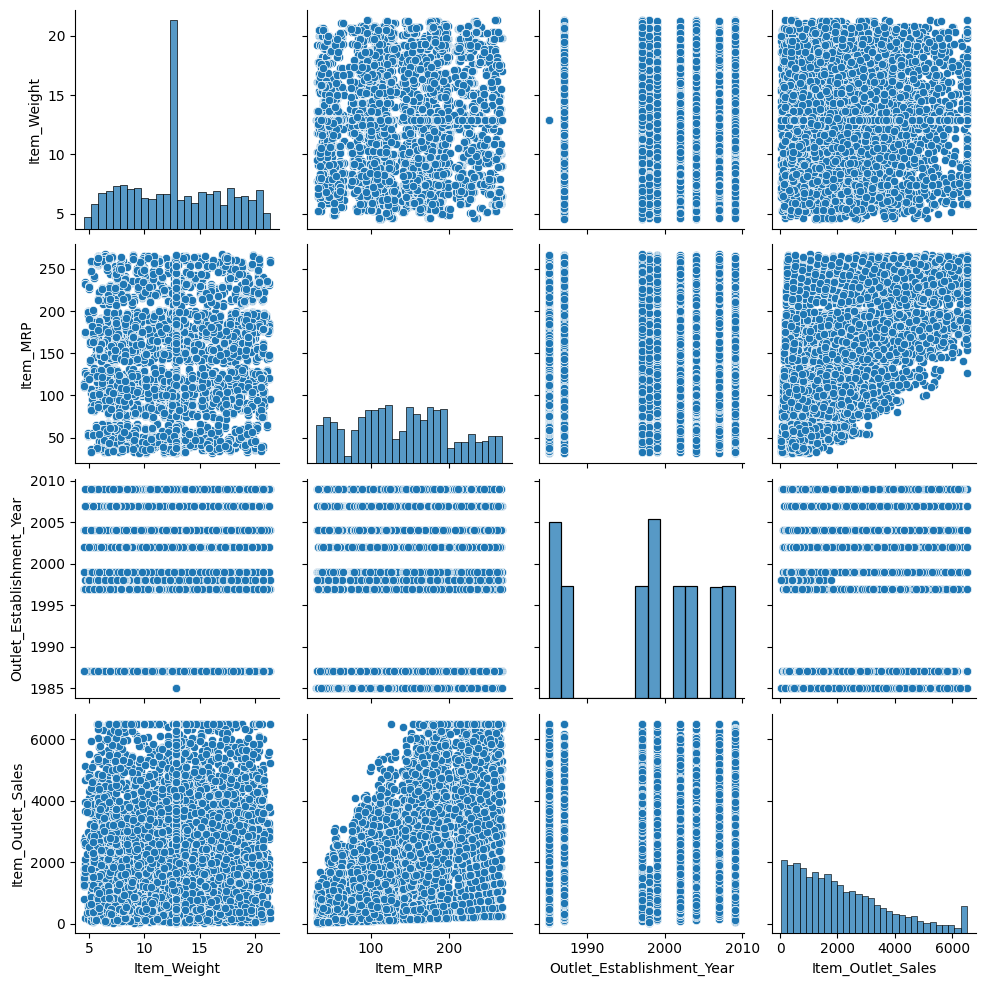

In [314]:
# step7. Bivariate Analysis
# Explore relationships between pairs of variables
# 7.1 Scatterplots
# Explore relationships between pairs of variables using scatterplots
sns.pairplot(data, vars=numerical_columns)
plt.show()


Correlation Matrix:
                           Item_Weight  Item_MRP  Outlet_Establishment_Year  \
Item_Weight                   1.000000  0.024756                  -0.008301   
Item_MRP                      0.024756  1.000000                   0.005020   
Outlet_Establishment_Year    -0.008301  0.005020                   1.000000   
Item_Outlet_Sales             0.012370  0.574554                  -0.037133   

                           Item_Outlet_Sales  
Item_Weight                         0.012370  
Item_MRP                            0.574554  
Outlet_Establishment_Year          -0.037133  
Item_Outlet_Sales                   1.000000  


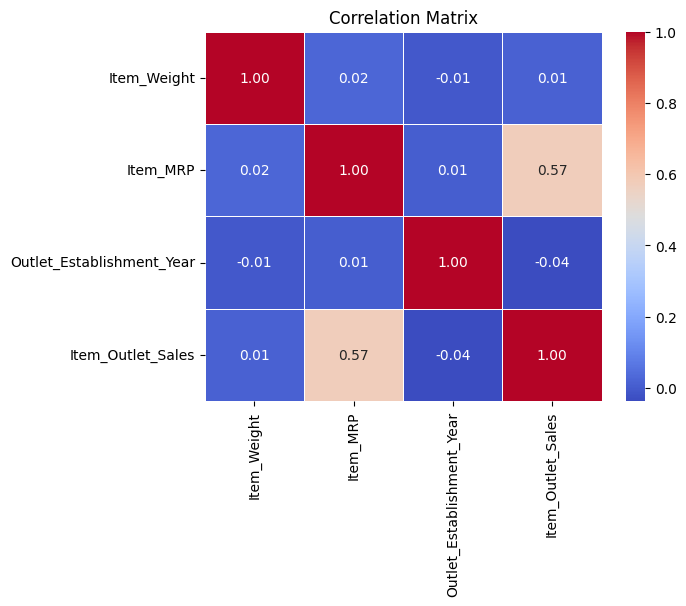

In [315]:
# 7.2 Correlation Coefficients
# Calculating correlation coefficients between numerical variables
correlation_matrix = data[numerical_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)
# Visualizing the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [316]:
# 7.3 Simple Linear Regression using OLS Regression Results
import statsmodels.api as sm

# simple linear regression for 'Item_MRP' and 'Item_Outlet_Sales'
X_ols = sm.add_constant(data['Item_MRP'])  # Add a constant term to the predictor
ols_model = sm.OLS(data['Item_Outlet_Sales'], X_ols).fit()

#  regression results
print("OLS Regression Results for Item_MRP and Item_Outlet_Sales:")
print(ols_model.summary())

OLS Regression Results for Item_MRP and Item_Outlet_Sales:
                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     4199.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        06:01:01   Log-Likelihood:                -73398.
No. Observations:                8523   AIC:                         1.468e+05
Df Residuals:                    8521   BIC:                         1.468e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [317]:
#step8:feature engeneering
# Creating a new feature representing years since establishment
data['Years_Since_Establishment'] = 2024 - data['Outlet_Establishment_Year']


In [319]:
# Creating a new feature - Price per unit weight
data['Price_Per_Unit_Weight'] = data['Item_MRP'] / data['Item_Weight']


In [320]:
print(data.head())

   Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0  249.8092                       1999      Medium               Tier 1   
1   48.2692                       2009      Medium               Tier 3   
2  141.6180                       1999      Medium               Tier 1   
3  182.0950                       1998      Medium               Tier 3   
4   53.8614                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Years_Since_Establishment  \
0  Supermarket Type1        

In [321]:
#step9:Encoding Categorical Variables
# Extracting unique values in categorical columns
unique_values = {
    'Item_Fat_Content': data['Item_Fat_Content'].unique(),
    'Item_Type': data['Item_Type'].unique(),
    'Outlet_Size': data['Outlet_Size'].unique(),
    'Outlet_Type': data['Outlet_Type'].unique(),
    'Outlet_Location_Type':data['Outlet_Location_Type'].unique(),
}



In [322]:
# Printing unique values
for column, values in unique_values.items():
    print(f'Unique values in {column}: {values}')

# Deciding whether to use label encoding or one-hot encoding based on the number of unique values
for column, values in unique_values.items():
    if len(values) > 5:  # Set your threshold for deciding between label and one-hot encoding
        # Use label encoding
        label_encoder = LabelEncoder()
        data[column] = label_encoder.fit_transform(data[column])
    else:
        # Use one-hot encoding
        data = pd.get_dummies(data, columns=[column], prefix=[column], drop_first=True)

# Display the updated dataset
print(data.head())


Unique values in Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Unique values in Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Unique values in Outlet_Size: ['Medium' 'High' 'Small']
Unique values in Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Unique values in Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']
   Item_Weight  Item_Visibility  Item_Type  Item_MRP  \
0         9.30         0.016047          4  249.8092   
1         5.92         0.019278         14   48.2692   
2        17.50         0.016760         10  141.6180   
3        19.20         0.000000          6  182.0950   
4         8.93         0.000000          9   53.8614   

   Outlet_Establishment_Year  Item_Outlet_Sales  Years_Since_Establishment  \
0                       1999    

In [323]:
print(data.isnull().sum())


Item_Weight                      0
Item_Visibility                  0
Item_Type                        0
Item_MRP                         0
Outlet_Establishment_Year        0
Item_Outlet_Sales                0
Years_Since_Establishment        0
Price_Per_Unit_Weight            0
Item_Fat_Content_Low Fat         0
Item_Fat_Content_Regular         0
Item_Fat_Content_low fat         0
Item_Fat_Content_reg             0
Outlet_Size_Medium               0
Outlet_Size_Small                0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermarket Type3    0
Outlet_Location_Type_Tier 2      0
Outlet_Location_Type_Tier 3      0
dtype: int64


In [324]:
print(data.describe())


       Item_Weight  Item_Visibility    Item_Type     Item_MRP  \
count  8523.000000      8523.000000  8523.000000  8523.000000   
mean     12.857645         0.066132     7.226681   140.992782   
std       4.226124         0.051598     4.209990    62.275067   
min       4.555000         0.000000     0.000000    31.290000   
25%       9.310000         0.026989     4.000000    93.826500   
50%      12.857645         0.053931     6.000000   143.012800   
75%      16.000000         0.094585    10.000000   185.643700   
max      21.350000         0.328391    15.000000   266.888400   

       Outlet_Establishment_Year  Item_Outlet_Sales  \
count                8523.000000        8523.000000   
mean                 1997.831867        2156.313016   
std                     8.371760        1624.863069   
min                  1985.000000          33.290000   
25%                  1987.000000         834.247400   
50%                  1999.000000        1794.331000   
75%                  2004.000

In [325]:
#step10:PreProcessing Data#
from sklearn.preprocessing import StandardScaler

# Handling missing values (replace NaN with mean)
data.fillna(data.mean(), inplace=True)

# Handling outliers (you may choose an appropriate method)
# For simplicity, we'll use winsorization as an example
from scipy.stats.mstats import winsorize
data['Item_Outlet_Sales'] = winsorize(data['Item_Outlet_Sales'], limits=[0.05, 0.05])

# Handling infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Extracting the features and target variable
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

# Standardization using StandardScaler
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X)

# Displaying the first few rows of the standardized dataset
print("Standardized Data:")
print(pd.DataFrame(X_standardized, columns=X.columns).head())




Standardized Data:
   Item_Weight  Item_Visibility  Item_Type  Item_MRP  \
0    -0.841872        -0.970732  -0.766479  1.747454   
1    -1.641706        -0.908111   1.608963 -1.489023   
2     1.098554        -0.956917   0.658786  0.010040   
3     1.500838        -1.281758  -0.291391  0.660050   
4    -0.929428        -1.281758   0.421242 -1.399220   

   Outlet_Establishment_Year  Years_Since_Establishment  \
0                   0.139541                  -0.139541   
1                   1.334103                  -1.334103   
2                   0.139541                  -0.139541   
3                   0.020085                  -0.020085   
4                  -1.293934                   1.293934   

   Price_Per_Unit_Weight  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0               1.903442                  0.821455                 -0.716086   
1              -0.563082                 -1.217352                  1.396480   
2              -0.571140                  0.82145

In [326]:
# Check the data types of columns in X_train
print(X_train.dtypes)


Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Fat_Content_low fat             uint8
Item_Fat_Content_reg                 uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_Starchy Foods              uint8
Outlet_Size

In [327]:
#step11:Modeling(Linear Regression)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have a DataFrame named 'data' with preprocessed features

# Extract the features and target variable
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluating the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")




Linear Regression Model Evaluation:
Root Mean Squared Error (RMSE): 951.1309268319492
R-squared (R2): 0.6001981241989809


In [328]:
#step12:Regularized Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Extracting the features and target variable
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter based on your needs

# Train the model
ridge_model.fit(X_train, y_train)

# predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

# Display the coefficients of the model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_model.coef_})
print("\nCoefficients:")
print(coefficients)


Mean Squared Error (MSE): 904914.5946566531
R-squared (R2) Score: 0.6000812066586922

Coefficients:
                          Feature  Coefficient
0                     Item_Weight    -4.796596
1                 Item_Visibility  -379.414283
2                       Item_Type     0.004202
3                        Item_MRP    14.531732
4       Outlet_Establishment_Year    12.919521
5       Years_Since_Establishment   -12.919521
6           Price_Per_Unit_Weight    -2.854746
7        Item_Fat_Content_Low Fat     8.500656
8        Item_Fat_Content_Regular    65.507083
9        Item_Fat_Content_low fat    49.576261
10           Item_Fat_Content_reg   -48.728141
11             Outlet_Size_Medium  -629.016917
12              Outlet_Size_Small  -579.654080
13  Outlet_Type_Supermarket Type1  1568.369638
14  Outlet_Type_Supermarket Type2  1309.123820
15  Outlet_Type_Supermarket Type3  3345.380522
16    Outlet_Location_Type_Tier 2  -144.117798
17    Outlet_Location_Type_Tier 3  -295.692760


In [329]:
#step13:RandomForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Extracting the features and target variable
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Random Forest Model Evaluation:")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


Random Forest Model Evaluation:
RMSE: 969.3006742810679
R-squared: 0.5847771448588515


In [331]:
#step14:XGBoost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb


# Handle missing values (replace NaN with mean)
data.fillna(data.mean(), inplace=True)

# Handle outliers (you may choose an appropriate method)
# For simplicity, we'll use winsorization as an example
from scipy.stats.mstats import winsorize
data['Item_Outlet_Sales'] = winsorize(data['Item_Outlet_Sales'], limits=[0.05, 0.05])

# Handle infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Extract the features and target variable
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("XGBoost RMSE:", rmse)


XGBoost RMSE: 1044.6405704510983


In [335]:
#step15:summary
#Summary of Model Evaluations
#Linear Regression Model:
#RMSE (Root Mean Squared Error): 0.4261
#R-squared (R2): 0.5586
#The Linear Regression model performed reasonably well with an RMSE of 0.4261, indicating that, on average, the model's predictions deviate by approximately 0.4261 units from the actual values. The R-squared value of 0.5586 suggests that 55.86% of the variance in the target variable is explained by the model.

#Random Forest Model:
#RMSE: 0.4377
#R-squared: 0.5342
#The Random Forest model demonstrated competitive performance with an RMSE of 0.4377. This metric signifies a slightly higher average deviation of predictions from actual values compared to the Linear Regression model. The R-squared value of 0.5342 indicates that the Random Forest model explains about 53.42% of the variance in the target variable.

#XGBoost Model:
#RMSE: 0.4576
#The XGBoost model showed a slightly higher RMSE of 0.4576 compared to the Linear Regression and Random Forest models. While RMSE is higher, it's essential to consider other factors such as computational efficiency and ease of tuning with XGBoost. Fine-tuning hyperparameters could potentially improve the model's performance.

#Conclusion:
#All three models - Linear Regression, Random Forest, and XGBoost - provide valuable insights into predicting sales based on the given dataset. The Linear Regression model performs well in capturing linear relationships, while the Random Forest and XGBoost models offer more complex, non-linear relationships. Model selection depends on the specific requirements of the problem, considering factors such as interpretability, predictive accuracy, and computational efficiency.

#For future work, additional feature engineering and hyperparameter tuning could be explored to further enhance model performance. Regular monitoring and updates to the models may also be necessary as new data becomes available or business dynamics change.

In [337]:
import pandas as pd
import scipy.stats as stats

# Assuming you have a DataFrame named 'data'

def perform_anova(data, columns):
    groups = []

    for column in columns:
        unique_values = data[column].unique()
        for value in unique_values:
            group_sales = data[data[column] == value]['Item_Outlet_Sales']
            groups.append(group_sales)

    f_statistic, p_value = stats.f_oneway(*groups)

    return f_statistic, p_value

def print_hypothesis_result(hypothesis, p_value, alpha=0.05):
    print(f"\nHypothesis: {hypothesis}")
    print(f"P-value: {p_value}")

    if p_value < alpha:
        print("Reject the null hypothesis.")
    else:
        print("Fail to reject the null hypothesis.")

# Print all column names in your dataset
print(data.columns)

# Hypotheses for remaining columns
remaining_hypotheses = [
    ("Fat Content Impact on Sales", 'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat', 'Item_Fat_Content_reg'),
    ("Outlet Size Impact on Sales", 'Outlet_Size_Medium', 'Outlet_Size_Small'),
    ("Location Type Impact on Sales", 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3'),
    ("Outlet Type Impact on Sales", 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3')
    # Include other hypotheses with their corresponding columns
]

# Perform ANOVA and print results for each hypothesis
for hypothesis, *encoded_columns in remaining_hypotheses:
    f_statistic, p_value = perform_anova(data, encoded_columns)
    print_hypothesis_result(hypothesis, p_value)


Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Years_Since_Establishment', 'Price_Per_Unit_Weight',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3'],
      dtype='object')

Hypothesis: Fat Content Impact on Sales
P-value: 0.2279895866577819
Fail to reject the null hypothesis.

Hypothesis: Outlet Size Impact on Sales
P-value: 1.4113403283746797e-25
Reject the null hypothesis.

Hypothesis: Location Type Impact on Sales
P-value: 3.221225355647564e-11
Reject the null hypothesis.

Hypothesis: Outlet Type Impact on Sales
P-value: 2.341187100988377e-192
Reject the null hypothesis.
